In [5]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib


In [6]:
# 2. Load the dataset
df = pd.read_csv("/content/data.csv")

In [7]:
# 3. View basic info and head
print("📌 Dataset Info:")
print(df.info())
print("\n🔍 First 5 Rows:")
print(df.head())

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   eating_habit_score      189 non-null    float64
 1   exam_marks              189 non-null    float64
 2   gender                  189 non-null    object 
 3   accommodation           189 non-null    object 
 4   residency               189 non-null    object 
 5   breakfast_frequency     189 non-null    object 
 6   fast_food_frequency     189 non-null    object 
 7   fruit_vegetable_intake  189 non-null    object 
 8   meals_per_day           189 non-null    object 
 9   caffeine_consumption    117 non-null    object 
dtypes: float64(2), object(8)
memory usage: 14.9+ KB
None

🔍 First 5 Rows:
   eating_habit_score  exam_marks  gender accommodation residency  \
0                25.1       875.2  Female   Day Scholar     Urban   
1                18.3       68

In [8]:
# 4. Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())


❓ Missing Values:
eating_habit_score         0
exam_marks                 0
gender                     0
accommodation              0
residency                  0
breakfast_frequency        0
fast_food_frequency        0
fruit_vegetable_intake     0
meals_per_day              0
caffeine_consumption      72
dtype: int64


In [9]:
# 5. Handle missing values
# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
# 6. Double-check missing values after handling
print("\n✅ After Handling Missing Values:")
print(df.isnull().sum())


✅ After Handling Missing Values:
eating_habit_score        0
exam_marks                0
gender                    0
accommodation             0
residency                 0
breakfast_frequency       0
fast_food_frequency       0
fruit_vegetable_intake    0
meals_per_day             0
caffeine_consumption      0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


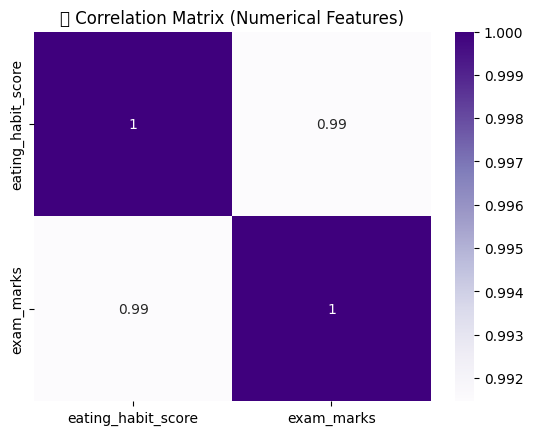

In [11]:
# 7. Visualize correlation (numerical)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Purples')
plt.title("📈 Correlation Matrix (Numerical Features)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


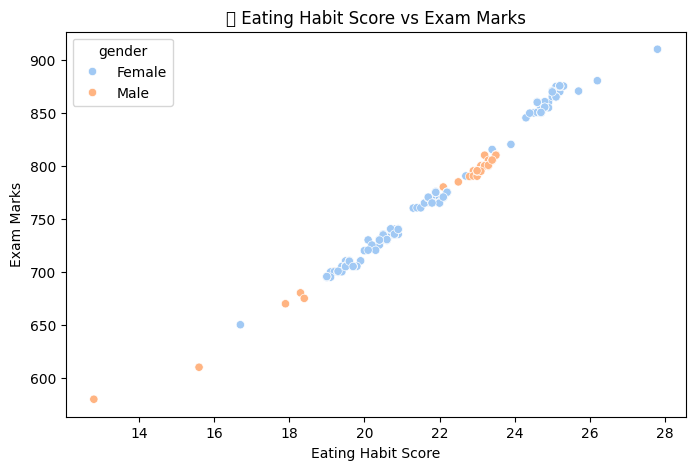

In [12]:
# 8. Relationship plot: Eating habits vs Exam marks
plt.figure(figsize=(8, 5))
sns.scatterplot(x='eating_habit_score', y='exam_marks', hue='gender', data=df, palette='pastel')
plt.title('🍎 Eating Habit Score vs Exam Marks')
plt.xlabel('Eating Habit Score')
plt.ylabel('Exam Marks')
plt.show()

In [13]:
# 9. Encode categorical features using Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
# 10. Define feature set and target variable
X = df.drop("exam_marks", axis=1)
y = df["exam_marks"]

In [15]:
# 11. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 12. Train three regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

model_names = ["Linear Regression", "Decision Tree", "Random Forest"]
errors = {}

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    errors[model_names[i]] = round(r2, 4)
    print(f"✅ {model_names[i]} R² Score: {r2:.4f}")

✅ Linear Regression R² Score: 0.9912
✅ Decision Tree R² Score: 0.9848
✅ Random Forest R² Score: 0.9974


/tmp/ipython-input-1459111884.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


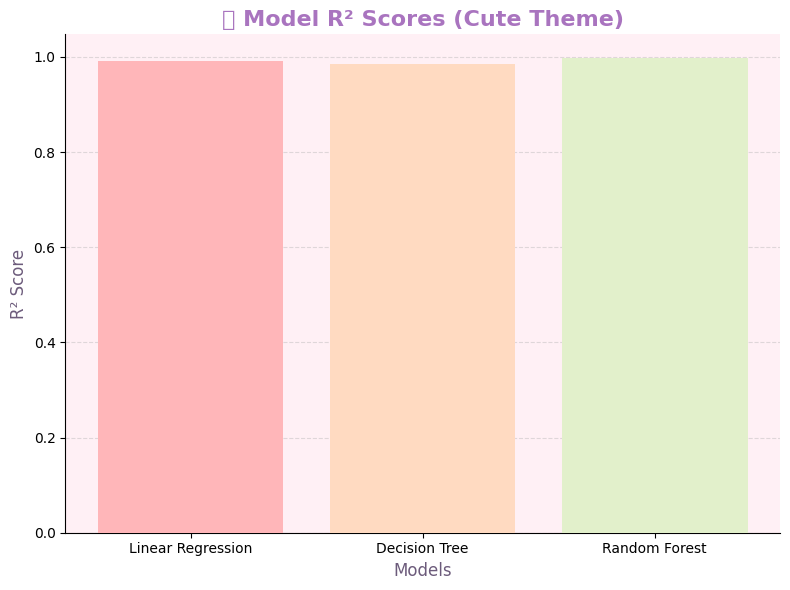

In [17]:
# 13. Visualize model performance (cute pastel theme)
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB']

plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

plt.title('📊 Model R² Scores (Cute Theme)', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R² Score', fontsize=12, color='#6C5B7B')
plt.gca().set_facecolor('#FFF0F5')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [18]:
# 14. Save best model (Random Forest in this example)
joblib.dump(models[2], 'BestModel_DietAcademic.joblib')

['BestModel_DietAcademic.joblib']

In [19]:
from google.colab import files
files.download('BestModel_DietAcademic.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>